## Chapter 14 - Deep Computer Vision Using Convolutional Neural Networks

### Question 9 - building cnn from scratch on MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

loading MNIST datset and splitting it to training and validation

In [2]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , train_size=0.8)

the model - a bit of an overkill for simple dataset such as MNIST, the model starts with convolutional layer with 32 feature maps, next applying max pooling. then another convolutional layer with 64 feature maps and flatting layer next, applying dropout for regularization and ending with dense layer with 10 neurons

In [37]:
inputs = keras.layers.Input(shape=(28,28,1))
x = keras.layers.Rescaling(1./255)(inputs)
x = keras.layers.Conv2D(32 , 3 , activation = "relu")(x)
x = keras.layers.MaxPooling2D(pool_size = 2)(x)
x = keras.layers.Conv2D(64,3,activation = "relu")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10 , activation = "softmax")(x)
model = keras.Model(inputs , outputs)

compiling the model and saving its best only

In [5]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="Models/q9_chapter14_covnet.keras" ,
                                           save_best_only=True,
                                           monitor = "val_loss")]
model.compile(loss= "sparse_categorical_crossentropy",
             optimizer = "adam" ,
             metrics = ["accuracy"])

fitting the model to the dataset

In [6]:
history = model.fit(X_train , y_train , epochs=10 , batch_size=32 , validation_data = (X_val , y_val) ,
                   callbacks=callbacks)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1732 - accuracy: 0.9477 - val_loss: 0.0648 - val_accuracy: 0.9828
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0502 - accuracy: 0.9844 - val_loss: 0.0424 - val_accuracy: 0.9876
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0339 - val_accuracy: 0.9890
Epoch 6/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.0349 - val_accuracy: 0.9897
Epoch 7/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0266 - accuracy: 0.9910 - val_loss: 0.0341 - val_ac

plotting the results -  the validation loss is fairly stable and so the accuracy

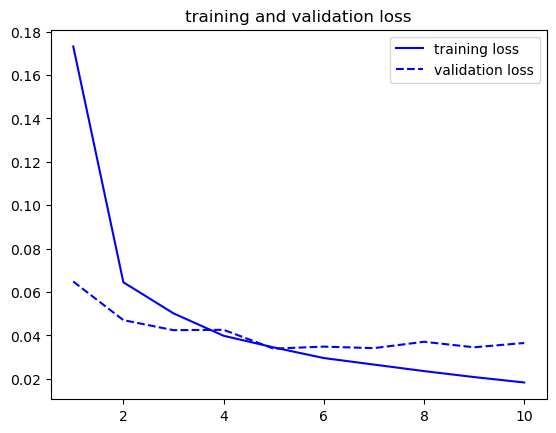

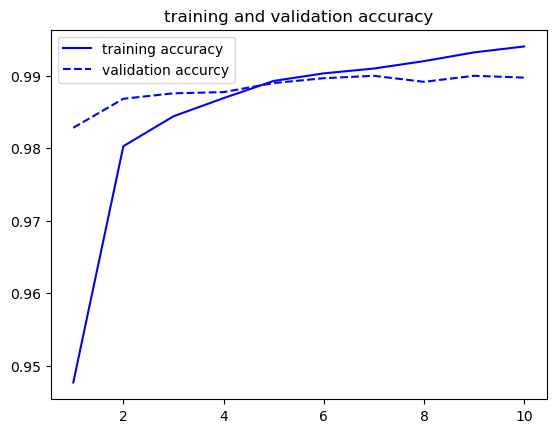

In [7]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1 , len(train_loss) + 1)
plt.plot(epochs , train_loss , "b-" , label = "training loss")
plt.plot(epochs , val_loss , "b--", label = "validation loss")
plt.title("training and validation loss")
plt.legend()
plt.figure()
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs , train_acc , "b-" , label = "training accuracy")
plt.plot(epochs , val_acc , "b--", label = "validation accurcy")
plt.title("training and validation accuracy")
plt.legend()
plt.show()

loading the best model and evaluating on the test set, with the results of 98% accuracy

In [8]:
test_model = keras.models.load_model("Models/q9_chapter14_covnet.keras")
test_model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0306 - accuracy: 0.9891


[0.030620837584137917, 0.9890999794006348]

### Question 10 - Using Transfer Learning

using resnet50 model on the cifar10 dataset

In [9]:
from keras.applications.resnet import ResNet50

splitting the data and preprocessing the inputs

In [16]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.cifar10.load_data()
X_train = keras.applications.resnet.preprocess_input(X_train)

In [17]:
X_train , X_val , y_train, y_val = train_test_split(X_train,y_train , train_size=0.8)
base_model = ResNet50(include_top=False , input_shape=(32,32,3) , weights = "imagenet")

freezing the layers of resnet50 model

In [18]:
for layer in base_model.layers:
    layer.trainable = False

adding top layer to our problem, when the only weights the are updating through gradients decent are the weights of the output layer. i did this mainly because of lack of computanional power

In [19]:
x = base_model.output
x = keras.layers.GlobalMaxPool2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10 , activation = "softmax")(x)
model = keras.Model(base_model.input , outputs)

compling the model and saving the best one


In [21]:
model.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" , metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(filepath="Models/q10_chapter14_transfer_learning.keras" ,
                                           save_best_only=True,
                                           monitor = "val_loss")]

In [22]:
history_before_tuning = model.fit(X_train , y_train , epochs = 5 , batch_size = 32 ,
                                 validation_data=(X_val , y_val) , callbacks=callbacks)

Epoch 1/5
1250/1250 [==============================] - 183s 145ms/step - loss: 2.4960 - accuracy: 0.4922 - val_loss: 1.3560 - val_accuracy: 0.6138
Epoch 2/5
1250/1250 [==============================] - 182s 145ms/step - loss: 1.8519 - accuracy: 0.5467 - val_loss: 1.3848 - val_accuracy: 0.6113
Epoch 3/5
1250/1250 [==============================] - 182s 146ms/step - loss: 1.8214 - accuracy: 0.5507 - val_loss: 1.4373 - val_accuracy: 0.6058
Epoch 4/5
1250/1250 [==============================] - 181s 145ms/step - loss: 1.8320 - accuracy: 0.5542 - val_loss: 1.4014 - val_accuracy: 0.6085
Epoch 5/5
1250/1250 [==============================] - 182s 146ms/step - loss: 1.8303 - accuracy: 0.5539 - val_loss: 1.4406 - val_accuracy: 0.6067


with only about 60% accuracy on the validation dataset, the model doesnt produce great results, again mainly because very simple added layer 

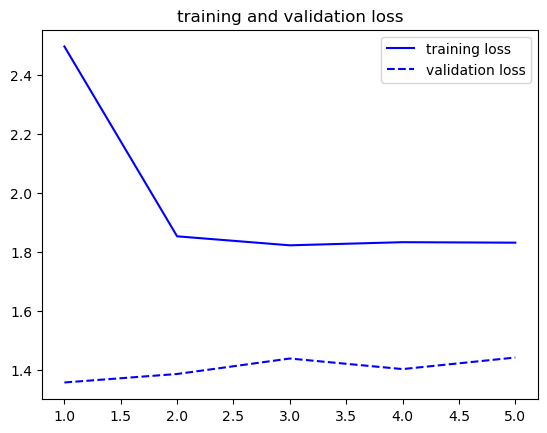

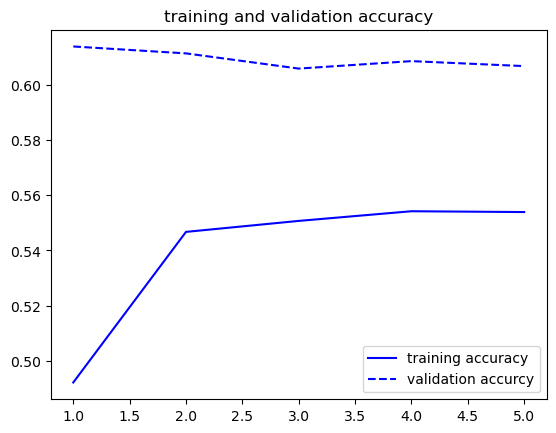

In [23]:
train_loss = history_before_tuning.history["loss"]
val_loss = history_before_tuning.history["val_loss"]
epochs = range(1 , len(train_loss) + 1)
plt.plot(epochs , train_loss , "b-" , label = "training loss")
plt.plot(epochs , val_loss , "b--", label = "validation loss")
plt.title("training and validation loss")
plt.legend()
plt.figure()
train_acc = history_before_tuning.history["accuracy"]
val_acc = history_before_tuning.history["val_accuracy"]
plt.plot(epochs , train_acc , "b-" , label = "training accuracy")
plt.plot(epochs , val_acc , "b--", label = "validation accurcy")
plt.title("training and validation accuracy")
plt.legend()
plt.show()

going through resnet50 base model, i decided to unfreeze only conv5_block3 layers

In [24]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_3
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

unfreezing the layers and compiling the model now with very small learning rate

In [39]:
for layer in model.layers[:165]:
   layer.trainable = False
for layer in model.layers[165:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.0001), loss='sparse_categorical_crossentropy' ,
             metrics= ["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(filepath="Models/q10_chapter14_transfer_learning_tuned.keras" ,
                                           save_best_only=True,
                                           monitor = "val_loss")]

In [30]:
history_after_tuning = model.fit(X_train , y_train , epochs = 5 , batch_size = 32 ,
                                 validation_data=(X_val , y_val) , callbacks=callbacks)

Epoch 1/5
1250/1250 [==============================] - 220s 174ms/step - loss: 1.5839 - accuracy: 0.5774 - val_loss: 1.2821 - val_accuracy: 0.6298
Epoch 2/5
1250/1250 [==============================] - 216s 173ms/step - loss: 1.4843 - accuracy: 0.5870 - val_loss: 1.2364 - val_accuracy: 0.6363
Epoch 3/5
1250/1250 [==============================] - 216s 173ms/step - loss: 1.4199 - accuracy: 0.5941 - val_loss: 1.1982 - val_accuracy: 0.6381
Epoch 4/5
1250/1250 [==============================] - 221s 177ms/step - loss: 1.3655 - accuracy: 0.6029 - val_loss: 1.1760 - val_accuracy: 0.6442
Epoch 5/5
1250/1250 [==============================] - 224s 179ms/step - loss: 1.3281 - accuracy: 0.6070 - val_loss: 1.1517 - val_accuracy: 0.6440


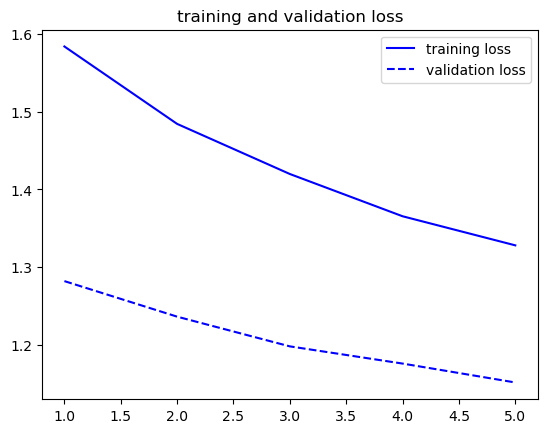

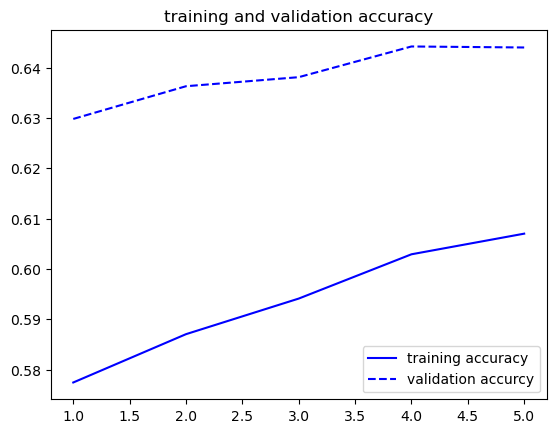

In [31]:
train_loss = history_after_tuning.history["loss"]
val_loss = history_after_tuning.history["val_loss"]
epochs = range(1 , len(train_loss) + 1)
plt.plot(epochs , train_loss , "b-" , label = "training loss")
plt.plot(epochs , val_loss , "b--", label = "validation loss")
plt.title("training and validation loss")
plt.legend()
plt.figure()
train_acc = history_after_tuning.history["accuracy"]
val_acc = history_after_tuning.history["val_accuracy"]
plt.plot(epochs , train_acc , "b-" , label = "training accuracy")
plt.plot(epochs , val_acc , "b--", label = "validation accurcy")
plt.title("training and validation accuracy")
plt.legend()
plt.show()

loading the model before tuning and after, and applying the preprocess to the test set

In [34]:
model_before_tuning = keras.models.load_model("Models/q10_chapter14_transfer_learning.keras")
model_after_tuning = keras.models.load_model("Models/q10_chapter14_transfer_learning_tuned.keras")
X_test = keras.applications.resnet.preprocess_input(X_test)

the tuned model got about 3% accuracy boost, not so much

In [35]:
model_before_tuning.evaluate(X_test, y_test)

313/313 [==============================] - 38s 118ms/step - loss: 1.3723 - accuracy: 0.6143


[1.3723090887069702, 0.614300012588501]

In [36]:
model_after_tuning.evaluate(X_test, y_test)

313/313 [==============================] - 37s 113ms/step - loss: 1.1449 - accuracy: 0.6476


[1.1449177265167236, 0.647599995136261]